### The Model contains 7 different algorithm for prediction of Breast Cancer whether it is Benign or Malignant and we trying to find which algorithm suits the best for the dataset.

### The dataset used in the model for training and testing is obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving breast_cancer.csv to breast_cancer.csv


In [3]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
dataset.shape

(683, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


## Taking care of missing data

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 6:7])
X[:, 6:7] = imputer.transform(X[:, 6:7])

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

## Training the Logistic Regression model on the Training set

In [10]:
from sklearn.linear_model import LogisticRegression
classifier_logistic_regression = LogisticRegression(random_state=0)
classifier_logistic_regression.fit(X_train, Y_train)

LogisticRegression(random_state=0)

# K-NN

## Training the K-NN model on the Training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier()

#  SVM

## Training the SVM model on the Training set

In [12]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state=0,probability=True)
classifier_svm.fit(X_train, Y_train)

SVC(kernel='linear', probability=True, random_state=0)

# Kernel SVM

## Training the Kernel SVM model on the Training set

In [13]:
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state=0,probability=True)
classifier_ksvm.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

# Naive Bayes

## Training the Naive Bayes model on the Training set

In [14]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB()

# Decision Tree

## Training the Decision Tree model on the Training set

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Random Forest

## Training the Random Forest model on the Training set

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting the Test set results

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model_distionary = {}

y_pred = classifier_logistic_regression.predict(X_test)
cm_lr = confusion_matrix(Y_test, y_pred)
accs = accuracy_score(Y_test, y_pred)
model_distionary["Logistic Regression"] = accs*100

y_pred = classifier_knn.predict(X_test)
cm_knn = confusion_matrix(Y_test, y_pred)
accs = accuracy_score(Y_test, y_pred)
model_distionary["K-NN"]  =  accs*100

y_pred = classifier_svm.predict(X_test)
cm_svm = confusion_matrix(Y_test, y_pred)
accs = accuracy_score(Y_test, y_pred)
model_distionary["SVM"] = accs*100

y_pred = classifier_ksvm.predict(X_test)
cm_ksvm = confusion_matrix(Y_test, y_pred)
accs = accuracy_score(Y_test, y_pred)
model_distionary["Kernel SVM"] = accs*100

y_pred = classifier_nb.predict(X_test)
cm_nb = confusion_matrix(Y_test, y_pred)
accs = accuracy_score(Y_test, y_pred)
model_distionary["Naive Bayes"] = accs*100

y_pred = classifier_dt.predict(X_test)
cm_dt = confusion_matrix(Y_test, y_pred)
accs = accuracy_score(Y_test, y_pred)
model_distionary["Decision Tree"] =  accs*100

y_pred = classifier_rf.predict(X_test)
cm_rf = confusion_matrix(Y_test, y_pred)
accs = accuracy_score(Y_test, y_pred)
model_distionary["Random Forest"] = accs*100

for key in model_distionary:
  print("The Prediction for ", key, '->', model_distionary[key])

The Prediction for  Logistic Regression -> 94.73684210526315
The Prediction for  K-NN -> 94.73684210526315
The Prediction for  SVM -> 94.15204678362574
The Prediction for  Kernel SVM -> 95.32163742690058
The Prediction for  Naive Bayes -> 94.15204678362574
The Prediction for  Decision Tree -> 95.90643274853801
The Prediction for  Random Forest -> 93.56725146198829


## Confusion Matrix

### Confusion Matrix Logistic Regression

Logistic Regression
[[103   4]
 [  5  59]]


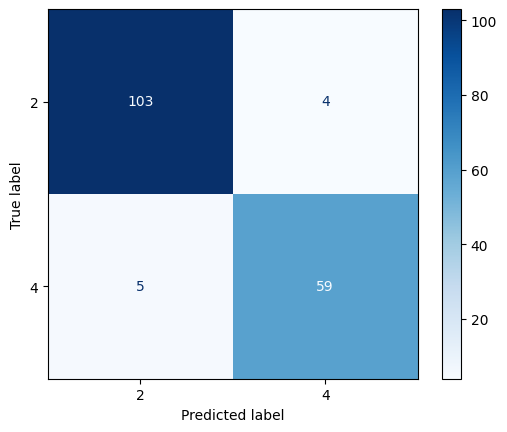

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print("Logistic Regression")
print(cm_lr)

# Compute confusion matrix
cm_lr = confusion_matrix(Y_test, classifier_logistic_regression.predict(X_test))

# Get the number of classes from the confusion matrix
classes = np.unique(Y_test)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=classes)  # Dynamic labels based on unique classes
disp.plot(cmap=plt.cm.Blues)

plt.show()


## Confusion Matrix K-NN

K-NN
[[103   4]
 [  5  59]]


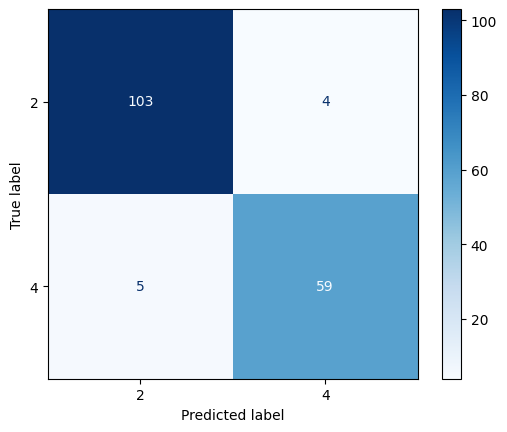

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("K-NN")
print(cm_knn)

# Compute confusion matrix for K-NN model
cm_knn = confusion_matrix(Y_test, classifier_knn.predict(X_test))

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

plt.show()


## Confusion Matrix SVM

SVM
[[102   5]
 [  5  59]]


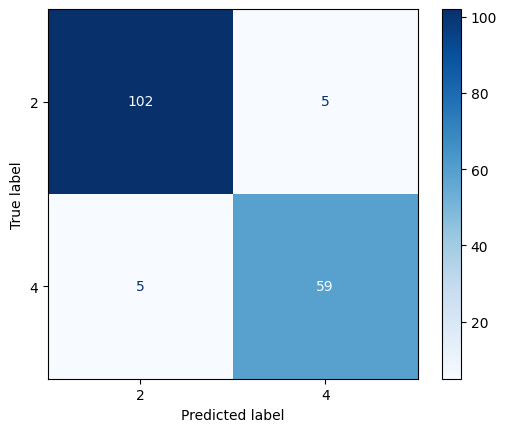

In [26]:
print("SVM")
print(cm_svm)

# Compute confusion matrix for SVM model
cm_svm = confusion_matrix(Y_test, classifier_svm.predict(X_test))

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

plt.show()

## Confusion Matrix Kernel SVM

Kernel SVM
[[102   5]
 [  5  59]]


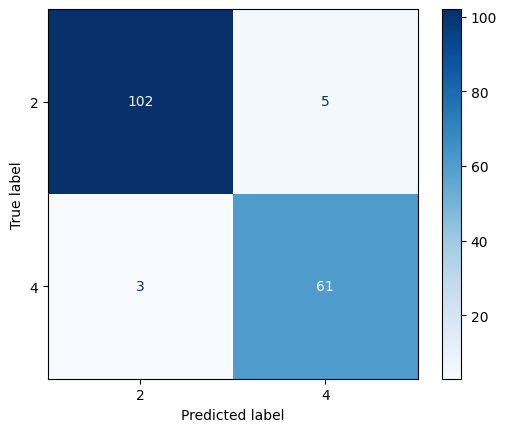

In [27]:

print("Kernel SVM")
print(cm_svm)

# Compute confusion matrix for Kernel SVM model
cm_svm = confusion_matrix(Y_test, classifier_ksvm.predict(X_test))

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

plt.show()

## Confusion Matrix Naive Bayes

Naive Bayes
[[99  8]
 [ 2 62]]


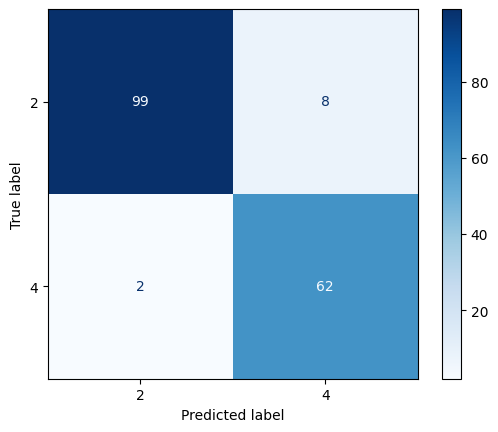

In [28]:
print("Naive Bayes")
print(cm_nb)

# Compute confusion matrix for Naive Bayes model
cm_nb = confusion_matrix(Y_test, classifier_nb.predict(X_test))

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

plt.show()

## Confusion Matrix Decision Tree

Decision Tree
[[103   4]
 [  3  61]]


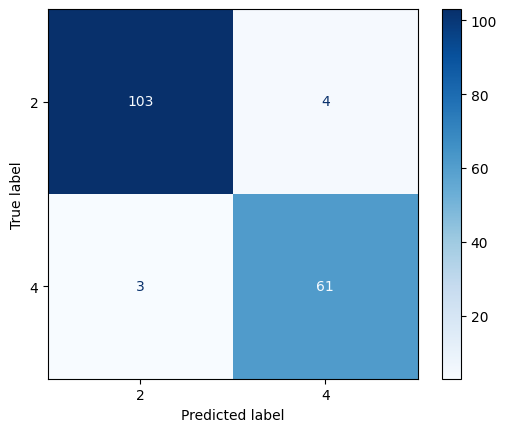

In [29]:
print("Decision Tree")
print(cm_dt)

# Compute confusion matrix for Decision Tree model
cm_dt = confusion_matrix(Y_test, classifier_dt.predict(X_test))

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

plt.show()

## Confusion Matrix Random Forest

Random Forest
[[102   5]
 [  6  58]]


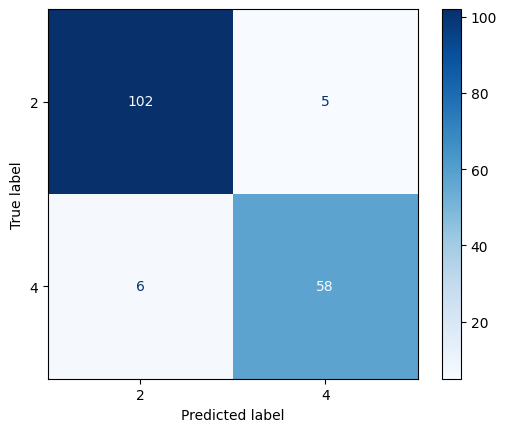

In [30]:
print("Random Forest")
print(cm_rf)

# Compute confusion matrix for Random Forest model
cm_rf = confusion_matrix(Y_test, classifier_rf.predict(X_test))

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(Y_test))
disp.plot(cmap=plt.cm.Blues)

plt.show()

## ROC Curve

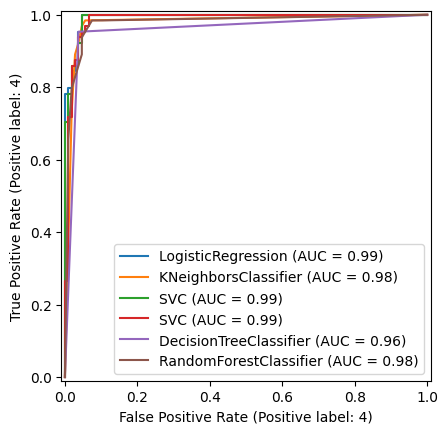

In [34]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot ROC curves for all classifiers
disp = RocCurveDisplay.from_estimator(classifier_logistic_regression, X_test, y=Y_test)
RocCurveDisplay.from_estimator(classifier_knn, X_test, y=Y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(classifier_svm, X_test, y=Y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(classifier_ksvm, X_test, y=Y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(classifier_dt, X_test, y=Y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(classifier_rf, X_test, y=Y_test, ax=disp.ax_)

# Show the plot
plt.show()


### Applying Voting Classifier to determine the prediction accuracy of the model(Soft voting)

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
eclf2 = VotingClassifier(estimators=[('lr', classifier_logistic_regression),('knn', classifier_knn),('svm', classifier_svm),
                            ('ksvm', classifier_ksvm),('dt', classifier_dt), ('rf', classifier_rf), ('gnb', classifier_nb)],
                             voting='soft')
eclf2 = eclf2.fit(X_train, Y_train)
y_pred = eclf2.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print("Final Acurracy of Soft Voting --->",acc*100)

Final Acurracy of Soft Voting ---> 95.90643274853801


### Applying Voting Classifier to determine the prediction accuracy of the model(Hard voting)

In [36]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', classifier_logistic_regression),('knn', classifier_knn),('svm', classifier_svm),
                            ('ksvm', classifier_ksvm),('dt', classifier_dt), ('rf', classifier_rf), ('gnb', classifier_nb)],
                             voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
y_pred = eclf1.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print("Final Acurracy of Hard Voting --->",acc*100)

Final Acurracy of Hard Voting ---> 95.32163742690058
